# Preparación de datos

## Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import random

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib_venn as vplt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from funciones import CargarPandasDataset, ModificarColumnasValor, BorrarColumnas, InsertarColumnaNueva

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## Funciones

In [3]:
def clasificacion(row):
    val = [0,0] #ninguno
    
    #abuso y violencia
    if row['P10_8_1'] == 1.0 or row['P10_8_2'] == 1.0 or row['P10_8_3'] == 1.0 or row['P10_8_4'] == 1.0 or row['P10_8_5'] == 1.0 or row['P10_8_6'] == 1.0 or row['P10_8_7'] == 1.0:
        val[0] = 1
    
    #atencion no autorizada
    if row['P10_8_8'] == 1.0 or row['P10_8_9'] == 1.0 or row['P10_8_10'] == 1.0 or row['P10_8_13'] == 2.0 or row['P10_8_14'] == 2.0:
        val[1] = 1
    
    if val[0]==1 and val[1]==1: #ambas
        return 3
    elif val[1]==1: #atencion no autorizada
        return 2
    elif val[0]==1: #abuso y violencia
        return 1
    else: 
        return 0 #ninguno    

def clasificacionAbuso(row):
    if row['P10_8_1'] == 1.0 or row['P10_8_2'] == 1.0 or row['P10_8_3'] == 1.0 or row['P10_8_4'] == 1.0 or row['P10_8_5'] == 1.0 or row['P10_8_6'] == 1.0 or row['P10_8_7'] == 1.0:
        return 1
    return 0

def clasificacionAtencion(row):
    if row['P10_8_8'] == 1.0 or row['P10_8_9'] == 1.0 or row['P10_8_10'] == 1.0 or row['P10_8_13'] == 2.0 or row['P10_8_14'] == 2.0:
        return 1
    return 0

def sumaBienesVivienda(row):
    return row[[f'P1_4_{i}' for i in range(1,10)]].T.sum()

def sumaFuentesDinero(row):
    return row[[f'P4_8_{i}' for i in range(1,8)]].T.sum()

def sumaPropiedadesHogar(row):
    return row[[f'P4_12_{i}' for i in range(1,8)]].T.sum()


## SECCIÓN I. CARACTERÍSTICAS DE LA VIVIENDA Y HOGARES EN LA VIVIENDA

### Cargar datos

In [4]:
ruta_parcial = "../../conjunto_de_datos_endireh_2021_csv/conjunto_de_datos_TVIV/conjunto_de_datos/conjunto_de_datos_TVIV.csv"

seccionI = CargarPandasDataset(ruta_parcial)

seccionI.iloc[random.choices(range(seccionI.shape[0]), k=5)]
#seccionI.iloc[[83867, 107779, 25309, 64234, 81172]]

,ID_VIV,UPM,VIV_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,COD_RES,P1_1,P1_2,...,P1_9,P1_10_1,P1_10_2,P1_10_3,P1_10_4,FAC_VIV,DOMINIO,EST_DIS,UPM_DIS,ESTRATO
94946,2502989.05,2502989,5,25,SINALOA\r,12,MAZATLÃN\r,1,3,2,...,NaN,NaN,NaN,NaN,NaN,206,U\r,444,13900,3
76228,2003187.07,2003187,7,20,OAXACA\r,467,SANTIAGO JAMILTEPEC\r,1,1,2,...,NaN,NaN,NaN,NaN,NaN,311,C\r,363,11179,1
17272,501801.05,501801,5,5,COAHUILA DE ZARAGOZA\r,30,SALTILLO\r,1,3,1,...,NaN,NaN,NaN,NaN,NaN,215,U\r,66,2588,2
113490,3006773.12,3006773,12,30,VERACRUZ DE IGNACIO DE LA LLAVE\r,124,PAPANTLA\r,1,2,2,...,NaN,NaN,NaN,NaN,NaN,777,C\r,581,16663,2
105345,2803248.02,2803248,2,28,TAMAULIPAS\r,27,NUEVO LAREDO\r,1,3,2,...,NaN,NaN,NaN,NaN,NaN,322,U\r,515,15384,2


In [5]:
seccionI.columns

Index(['ID_VIV', 'UPM', 'VIV_SEL', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN',
       'COD_RES', 'P1_1', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2',
       'P1_4_3', 'P1_4_4', 'P1_4_5', 'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9',
       'P1_5', 'P1_6', 'P1_7', 'P1_8', 'P1_9', 'P1_10_1', 'P1_10_2', 'P1_10_3',
       'P1_10_4', 'FAC_VIV', 'DOMINIO', 'EST_DIS', 'UPM_DIS', 'ESTRATO'],
      dtype='object')

### Hacer columnas One Hot Encoding


Cambiar los valores $2$ a $0$.

Bienes de vivienda (si tienen  televisión ,lavadora , auto, internet, etc) P1_4_{1, 2, 3, ..., 9}.

In [6]:
columnasOHE = [f'P1_4_{i}' for i in range(1,10)]

seccionI = ModificarColumnasValor(df=seccionI, cols=columnasOHE, valorR=2, valorN=0)

### Política de datos faltantes

P1_9 la cantidad de hogares en la vivienda se debe poner la existencia de 1 hogar en la vivienda.

In [7]:
seccionI = ModificarColumnasValor(df=seccionI, cols=['P1_9'], valorR=np.nan, valorN=1)

### Creación de nueva columna
Para la simplificación de los datos, se contará con cuantos bienes cuenta en la vivienda en lugar de cuáles.

In [8]:
seccionI[[f'P1_4_{i}' for i in range(1,10)]].T.sum().value_counts() # bienes de la vivienda  
# conteo: numero de bienes en la vivienda (BIENES_DE_VIVIENDA)

7    19607
8    19584
6    19191
5    18521
4    14310
9    13897
3     8836
2     4910
1     2563
0     1227
dtype: int64

In [9]:
seccionI['BIENES_DE_VIVIENDA'] = seccionI[[f'P1_4_{i}' for i in range(1,10)]].T.sum()

### Borrar columnas

1. P1_8 Se reemplazó al solo usar P1_9
5. VIV_SEL y HOGAR no tiene sentido sin ID_VIV.
6. UPM (unidad primaria de muestreo), UPM_DIS (UPM de diseño), EST_DIS (estrato de diseño), ESTRATO, se pueden omitir al ser dato de la tecnica de muestreo y no de la mujer.
7. FAC_VIV es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las viviendas y la población en general.
8. FAC_MUJ es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las mujeres de 15 años y más.
9. CVE_MUN La clave de municipio depende del estado, habiendo un total de 32 municipios registrados como 1.


In [10]:
labels = ['CVE_ENT', 'NOM_ENT', 'NOM_MUN', 'COD_RES', 'P1_8',
         "VIV_SEL", "UPM", 'UPM_DIS', 'EST_DIS', 'FAC_VIV', 'CVE_MUN', 'ESTRATO']
labels.extend([F'P1_4_{i}' for i in range(1,10)])

seccionI = BorrarColumnas(df=seccionI, cols=labels)

### Guardar dataset

## SECCIÓN II. CARACTERÍSTICAS SOCIODEMOGRÁFICAS DE RESIDENTES DE LA VIVIENDA

### Cargar los datos

In [11]:
ruta_parcial = "../../conjunto_de_datos_endireh_2021_csv/conjunto_de_datos_TSDem/conjunto_de_datos/conjunto_de_datos_TSDem.csv"

seccionII = CargarPandasDataset(ruta_parcial)

seccionII.iloc[random.choices(range(seccionII.shape[0]), k=5)]

,ID_VIV,ID_PER,UPM,VIV_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,HOGAR,N_REN,...,COD_M15,CODIGO,REN_MUJ_EL,REN_INF_AD,FAC_VIV,FAC_MUJ,DOMINIO,ESTRATO,EST_DIS,UPM_DIS
237619,1801624.19,1801624.19.1.02\r,1801624,19,18,NAYARIT\r,15,SANTIAGO IXCUINTLA\r,1,2,...,1.0,1.0,2.0,2.0,89,89,C\r,2,328,10137
260956,2002500.18,2002500.18.1.02\r,2002500,18,20,OAXACA\r,136,SAN FELIPE USILA\r,1,2,...,NaN,NaN,NaN,2.0,282,0,C\r,1,365,11136
369516,2803388.02,2803388.02.1.01\r,2803388,2,28,TAMAULIPAS\r,27,NUEVO LAREDO\r,1,1,...,NaN,NaN,NaN,NaN,266,0,U\r,2,515,15398
199404,1525922.19,1525922.19.1.04\r,1525922,19,15,MÃXICO\r,67,OTZOLOTEPEC\r,1,4,...,NaN,NaN,NaN,NaN,873,0,C\r,1,273,8725
226576,1703114.11,1703114.11.1.07\r,1703114,11,17,MORELOS\r,20,TEPOZTLÃN\r,1,7,...,NaN,NaN,NaN,7.0,168,0,C\r,2,316,9709


### Modificar columnas a OHE

Cambiar los valores $2$ a $0$.

In [12]:
columnasOHE = ['P2_8', 'P2_9', 'P2_11', 'P2_13']

seccionII = ModificarColumnasValor(df=seccionII, cols=columnasOHE, valorR=2, valorN=0)

### Política de datos faltantes

Si P2_7 es mayor a 2 (estudio mínimo la secundaria) se salta la pregunta P2_8 porque asume que sabrán escribir. Por ello, los valores nulos se remplazan por si (1) y hacer que el valor 9 (no especificado) sea nan.

In [13]:
seccionII[seccionII.NIV>2] = ModificarColumnasValor(df=seccionII[seccionII.NIV>2], cols='P2_8', valorR=np.nan, valorN=1)
seccionII = ModificarColumnasValor(df=seccionII, cols='P2_8', valorR=9, valorN=np.nan)

### Discretizar P2_5 y P2_6

del 1 al 30 son las viviendas registradas en la propiedad, en la 96 es si vive en otro lugar, 97 si falleció y 98 si no sabe.

Se discretiza a 1 como valor de que viven en la misma vivienda, 2 como vive en otro lugar, 3 como falleció y nan si no sabe.

In [14]:
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_5'], valorR=range(31), valorN=1)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_5'], valorR=96, valorN=2)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_5'], valorR=97, valorN=3)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_5'], valorR=98, valorN=np.nan)

In [15]:
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_6'], valorR=range(31), valorN=1)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_6'], valorR=96, valorN=2)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_6'], valorR=97, valorN=3)
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_6'], valorR=98, valorN=np.nan)

### Discretizar columna PAREN

Según la (Clasificación de parentescos 2012 del INEGI)[https://www.inegi.org.mx/contenidos/programas/mti/2013/doc/clasificacion_parentescos.pdf] existen 9 grupos principales de parentesco que son.

| Grupo | Descripción                | De los datos en la encuesta incluiría |
|:-----:|:--------------------------:|:--------------------:|
| 1     | Jefa o jefe                | Jefa o jefe (1) |
| 2     | Esposa o esposo            | Esposa(o) o pareja)  (2) |
| 3     | Hija o hijo                | Hija(o) (3) |
| 4     | Otro parentesco            | Nieta(o) (4), Nuera o yerno (5), Hermana(o) (6), Madre o padre (7), Suegra(o) (8), Otro parentesco (9) |
| 5     | No tiene parentesco        | Sin parentesco (10) |
| 6     | Trabajador(a) doméstico(a) | Empleada(o) doméstica(o) (11) |
| 7     | Huésped                    |  |
| 9     | Parentesco no especificado |  |

Que esto nos ayuda a crear menos clasificaciones en los datos para balancear la desigualdad de los datos.

In [16]:
seccionII.PAREN.value_counts(dropna=False)*100/seccionII.shape[0]

3     37.726981
1     29.317660
2     18.208834
4      7.253678
9      2.333933
5      1.930694
6      1.159341
10     0.837674
7      0.831435
8      0.366497
11     0.033276
Name: PAREN, dtype: float64

In [17]:
seccionII = ModificarColumnasValor(df=seccionII, cols=['PAREN'],
                                       valorR=[5,6,7,8,9], valorN=4)
seccionII = ModificarColumnasValor(df=seccionII, cols=['PAREN'], 
                                       valorR=10, valorN=5)
seccionII = ModificarColumnasValor(df=seccionII, cols=['PAREN'], 
                                       valorR=11, valorN=6)

In [18]:
seccionII.PAREN.value_counts(dropna=False)*100/seccionII.shape[0]

3    37.726981
1    29.317660
2    18.208834
4    13.875576
5     0.837674
6     0.033276
Name: PAREN, dtype: float64

### Borrar columnas

1. N_REN, REN_INF_AD, CODIGO y COD_M15 que son datos metodológicos.
4. NOMBRE sin registros.
6. P2_16 se borra porque está reflejado en la variable _T\_INSTRUM_.
5. VIV_SEL y HOGAR no tiene sentido sin ID_VIV.
6. UPM (unidad primaria de muestreo), UPM_DIS (UPM de diseño), EST_DIS (estrato de diseño), ESTRATO, se pueden omitir al ser dato de la tecnica de muestreo y no de la mujer.
7. FAC_VIV es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las viviendas y la población en general.
8. FAC_MUJ es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las mujeres de 15 años y más.
9. CVE_MUN La clave de municipio depende del estado, habiendo un total de 32 municipios registrados como 1.

In [19]:
seccionII.columns

Index(['ID_VIV', 'ID_PER', 'UPM', 'VIV_SEL', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN',
       'NOM_MUN', 'HOGAR', 'N_REN', 'NOMBRE', 'PAREN', 'SEXO', 'EDAD', 'P2_5',
       'P2_6', 'NIV', 'GRA', 'P2_8', 'P2_9', 'P2_10', 'P2_11', 'P2_12',
       'P2_13', 'P2_14', 'P2_15', 'P2_16', 'COD_M15', 'CODIGO', 'REN_MUJ_EL',
       'REN_INF_AD', 'FAC_VIV', 'FAC_MUJ', 'DOMINIO', 'ESTRATO', 'EST_DIS',
       'UPM_DIS'],
      dtype='object')

In [20]:
labels = ['NOM_ENT', 'NOM_MUN', 'NOMBRE', 'N_REN', 'REN_MUJ_EL', 'REN_INF_AD', 'CODIGO', 'COD_M15', 'P2_16',
         "VIV_SEL", "HOGAR", "UPM", 'UPM_DIS', 'EST_DIS', 'ESTRATO', 'FAC_VIV', 'FAC_MUJ', 'CVE_MUN']

seccionII = BorrarColumnas(df=seccionII, cols=labels)

### Guardar dataset

## SECCIÓN III. ELEGIBILIDAD Y VERIFICACIÓN DE ESTADO CONYUGAL DE LA MUJER ELEGIDA DE 15 AÑOS O MÁS

P3_{1,2,3,...,8} tiene informacion que se ve reflejada en la variable T_INSTRUM, por eso se deberían borrar todas.
Ya que en la encuesta general se ve que con base en las preguntas se elige el futuro de T_INSTRUM.
Por ello, no cargamos esta parte de la encuesta.

## SECCIÓN IV. INGRESOS Y RECURSOS

In [21]:
ruta_parcial = "../../conjunto_de_datos_endireh_2021_csv/conjunto_de_datos_TB_SEC_IV/conjunto_de_datos/conjunto_de_datos_TB_SEC_IV.csv"

seccionIV = CargarPandasDataset(ruta_parcial)

seccionIV.shape

(110127, 75)

### Modificar columnas a OHE

'P4_1', 'P4_8_i', i pertenece {1,...,7}, 'P4_11', 'P4_12_i', i pertenece {1,...,7}, 'P4C_1', 'P4BC_4', 'P4BC_5'

Cambiar los valores $2$ a $0$.

In [22]:
columnasOHE = ['P4_1', 'P4_11']
columnasOHE.extend([f'P4_12_{i}' for i in range(1,8)])
columnasOHE.extend([f'P4_8_{i}' for i in range(1,8)])

seccionIV = ModificarColumnasValor(df=seccionIV, cols=columnasOHE, valorR=2, valorN=0)

### Limpiar los códigos (política de datos faltantes)
- 'P4_2_1', 'P4B_2','P4_3', 'P4_5_1_AB', 'P4_6_AB' ## hacer 9 nan
- 'P4AB_2', 'P4BC_1', ## hacer 99 nan
- 'P4_7_AB' ## 999998 y 999999 hacer nan


In [23]:
columnasNaN = ['P4_3', 'P4_5_1_AB', 'P4_6_AB']
seccionIV = ModificarColumnasValor(df=seccionIV, cols=columnasNaN, valorR=9, valorN=np.nan)

seccionIV = ModificarColumnasValor(df=seccionIV, cols=['P4_7_AB'], valorR=999998, valorN=np.nan)
seccionIV = ModificarColumnasValor(df=seccionIV, cols=['P4_7_AB'], valorR=999999, valorN=np.nan)

### Creación de nueva columna
Para la simplificación de los datos, se contará con cuantas fuentes de ingresos tiene la entrevistada y propiedades hay en el hogar.

In [24]:
seccionIV[[F'P4_8_{i}' for i in range(1,8)]].T.sum().value_counts() # fuentes de dinero
# conteo: numero de fuentes de ingresos (FUENTES_DE_DINERO)

0    76448
1    28174
2     5016
3      442
4       45
5        2
dtype: int64

In [25]:
seccionIV[[F'P4_12_{i}' for i in range(1,8)]].T.sum().value_counts() # propiedades del hogar 
# conteo: numero de propiedades del hogar (PROPIEDADES_DEL_HOGAR)

1    39815
2    31278
0    23524
3    11205
4     3175
5      850
6      228
7       52
dtype: int64

In [26]:
seccionIV['FUENTES_DE_DINERO'] = seccionIV[[f'P4_8_{i}' for i in range(1,8)]].T.sum()
seccionIV['PROPIEDADES_DEL_HOGAR'] = seccionIV[[f'P4_12_{i}' for i in range(1,8)]].T.sum()

### Borrar columnas

1. P4A_1 se borra porque nos interesa P4A_2 quee es la rutina, no lo inmediato.
2. P4_4 tiene más de 23000 nombres de trabajos, lo cuales no necesitamos saber
3. P4_4_CVE tiene 470 claves de tipos de trabajo los cuales no encontré documentación oficial para discretizar, por lo tanto al tener tantas clasificaciones daría problemas al entrenar. 
4. 'P4_10_i_j', i pertenece {2,3} y j pertenece {1,2,3} Muchos nan que complican la creación en el modelo, para que lo demás salga bien se decide ignorar estos
5. VIV_SEL y HOGAR no tiene sentido sin ID_VIV.
6. UPM (unidad primaria de muestreo), UPM_DIS (UPM de diseño), EST_DIS (estrato de diseño), ESTRATO, se pueden omitir al ser dato de la tecnica de muestreo y no de la mujer.
7. FAC_VIV es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las viviendas y la población en general.
8. FAC_MUJ es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las mujeres de 15 años y más.
9. CVE_MUN La clave de municipio depende del estado, habiendo un total de 32 municipios registrados como 1.

In [27]:
labels = ['NOM_ENT', 'NOM_MUN', 'N_REN', 'N_REN_ESP', 'P4A_1', 'P4_4', 'P4_4_CVE',
         "VIV_SEL", "HOGAR", "UPM", 'UPM_DIS', 'EST_DIS', 'ESTRATO', 'FAC_VIV', 'FAC_MUJ', 'CVE_MUN']
labels.extend([f'P4_8_{i}' for i in range(1,8)])
labels.extend([f'P4_10_{i}_{j}' for i in [2,3] for j in [1,2,3]])
labels.extend([f'P4_12_{i}' for i in range(1,8)])

seccionIV = BorrarColumnas(df=seccionIV, cols=labels)

### Guardar dataset

## SECCIÓN X. ATENCIÓN OBSTÉTRICA

### Cargar datos

In [28]:
ruta_parcial = "../../conjunto_de_datos_endireh_2021_csv/conjunto_de_datos_TB_SEC_X/conjunto_de_datos/conjunto_de_datos_TB_SEC_X.csv"

seccionX = CargarPandasDataset(ruta_parcial)

seccionX.iloc[random.choices(range(seccionX.shape[0]), k=5)]

,ID_VIV,ID_PER,UPM,VIV_SEL,HOGAR,N_REN,DOMINIO,CVE_ENT,NOM_ENT,CVE_MUN,...,P10_8_11,P10_8_12,P10_8_13,P10_8_14,P10_8_15,FAC_VIV,FAC_MUJ,ESTRATO,UPM_DIS,EST_DIS
45752,1406752.02,1406752.02.1.02\r,1406752,2,1,2,U\r,14,JALISCO\r,101,...,NaN,NaN,NaN,NaN,NaN,698,1396,4,7854,240
95557,2808226.05,2808226.05.1.01\r,2808226,5,1,1,C\r,28,TAMAULIPAS\r,19,...,NaN,NaN,NaN,NaN,NaN,253,506,2,15769,527
13783,500804.04,0500804.04.1.02\r,500804,4,1,2,U\r,5,COAHUILA DE ZARAGOZA\r,18,...,2.0,1.0,1.0,1.0,NaN,160,160,3,2484,79
6119,207590.20,0207590.20.1.04\r,207590,20,1,4,C\r,2,BAJA CALIFORNIA\r,4,...,NaN,NaN,NaN,NaN,NaN,262,524,2,1338,30
6122,207596.03,0207596.03.1.01\r,207596,3,1,1,C\r,2,BAJA CALIFORNIA\r,4,...,NaN,NaN,NaN,NaN,NaN,268,268,2,1339,30


### 2. Preservar los datos de las embarazadas


Borrar los registros de todas aquellas que repondieron que no estuvieron embarazadas entre Octubre 2016 hasta finales 2021 o que no se tenga resgistro de su respuesta. La manera fácil es solo preservar los registros de las que respondieron que sí estuvieron embarazadas en ese periodo de tiempo.

In [29]:
seccionX = seccionX[(seccionX.P10_2 == 1)]

En la pregunta 10.6. ¿En qué año fue su último parto? si el último parto fue antes del 2016, está embarazada por primera vez (0000), fue aborto (8888) o no especificado (9999) se pasa a la sección XI. Se preservan aquellas que tuvieron embarazo después del 2015 y antes del 2022 (sin incluirlos).

En la pregunta 10.7. ¿Dónde atendieron su último parto? si Nadie la atendió porque dio a luz sola (9) se pasa a la sección XI. 
Por lo tanto se deben borrar los registros que no contestaron toda la sección.

In [30]:
seccionX.drop(seccionX[((seccionX["P10_6ANIO"]<2016.0) | (seccionX["P10_6ANIO"]>2021.0))].index, axis=0, inplace=True)
#seccionX.drop(seccionX[seccionX["P10_7"]==9].index, axis=0, inplace=True)

Dejar los años en términos de años simples al restarles 2010 años.

In [31]:
seccionX["P10_6ANIO"] = seccionX["P10_6ANIO"]-2015

#### 2.2 Conservar solo los registros de hospitales públicos

Borrar aquellos datos mayores al valor 5 (Hospital o Clínica privada, Consultorio Médico particular, En casa con partera o curandera(o), Nadie la atendió, dio a luz sola, Otro).

In [32]:
seccionX.drop(seccionX[(seccionX.P10_7 > 5)].index, inplace = True)

### 3 Política de datos faltantes

Hay 1 registro con el valor de aborto nulo. como se tiene la información de que tuvo 2 embarazos, 1 nació vivo y 0 muertos, se puede deducir que el valor en ese registro debe ser 1.

In [33]:
seccionX[(seccionX.P10_4_1.isnull()) |(seccionX.P10_4_2.isnull()) | (seccionX.P10_4_3.isnull())][['P10_3', 'P10_4_1', 'P10_4_2', 'P10_4_3']]

,P10_3,P10_4_1,P10_4_2,P10_4_3
40712,2.0,1.0,0.0,NaN


In [34]:
seccionX.loc[40712, 'P10_4_3'] = 1.0

Los registros de cuántos embarazos tuvo no coinciden con la cantidad de bebés que nacieron vivos, muertos o fueron abortados, algunos solo registran la cantidad de vivos pero no los muertos ni los abortos. Existen 683 registros que no coinciden con los datos registrados de abrotos, nacieron vivos y nacieron muertos.

Los datos negativos reflejan cuántos más fueron reportados como vivos y muertos y abortos y los positivos es que se reportaron más embarazos que los que se dio info al respecto. Podrían significar embarazos actuales que no han llegado a término y solo representan el 9.9% de los datoas así que se conservará.

In [35]:
(seccionX.P10_3-(seccionX.P10_4_1+seccionX.P10_4_2+seccionX.P10_4_3)).value_counts()

 0.0     12730
-1.0       713
 1.0       334
-2.0       209
-3.0        86
-4.0        34
-5.0         7
-6.0         5
 2.0         2
-8.0         1
 3.0         1
 16.0        1
-10.0        1
 4.0         1
-7.0         1
dtype: int64

In [36]:
(seccionX.P10_3-(seccionX.P10_4_1+seccionX.P10_4_2+seccionX.P10_4_3)).value_counts()[-1:].sum()

1396

### 3. Agregar columnas

#### 3.1 Afiliación de servicios medicos

In [37]:
seccionX[[F'P10_1_{i}' for i in range(1,10)]].T.sum().value_counts() # afiliada servicios medicos

1.0    13971
2.0      151
3.0        4
dtype: int64

In [38]:
term = ['IMSS', 'Prospera', 'ISSSTE', 'ISSSTE estatal', 'Pemex, Defensa o Marina', 
        'Seguro Popular', 'Seguro de Gastos Médicos Mayores', 'Otro servicio', 'Sin afiliación']

freq = {F'P10_1_{i}':['-']*(i-1) for i in range(1,10)}

for i in range(1,10):
    for j in range(i,10):
        res=seccionX[(seccionX[f'P10_1_{i}']==1) & (seccionX[f'P10_1_{j}']==1)].shape[0]
        freq[f'P10_1_{i}'].append(res)

pd.DataFrame.from_dict(freq, orient='index', columns=term)

,IMSS,Prospera,ISSSTE,ISSSTE estatal,"Pemex, Defensa o Marina",Seguro Popular,Seguro de Gastos Médicos Mayores,Otro servicio,Sin afiliación
P10_1_1,4933,9,46,5,1,55,24,3,0
P10_1_2,-,282,1,0,0,5,1,0,0
P10_1_3,-,-,486,2,0,3,3,0,0
P10_1_4,-,-,-,90,0,0,0,0,0
P10_1_5,-,-,-,-,48,1,0,0,0
P10_1_6,-,-,-,-,-,3080,1,3,0
P10_1_7,-,-,-,-,-,-,40,0,0
P10_1_8,-,-,-,-,-,-,-,256,0
P10_1_9,-,-,-,-,-,-,-,-,5070


Se guardaran como parejas aquellos que tengan 2 dígitos. Los códigos son:

0. IMSS
1. IMSS-Bienestar (antes Prospera)
2. ISSSTE
3. ISSSTE estatal
4. Pemex, Defensa o Marina
5. Instituto de Salud para el Bienestar (INSABI) (antes Seguro Popular)
6. Seguro de Gastos Médicos Mayores
7. Otro servicio de salud pública del estado
8. Entonces, ¿no está afiliada ni tiene derecho a servicios médicos?
9. ISSSTE (3) - IMSS (1) (con 46 registros). 
10. Seguro Popular (6) - IMSS (1) (con 55 registros). 
11. Seguro de gastos médicos mayores (7) - IMSS (1) (con 24 registros).

In [39]:
seccionX['SERVICIOS_MEDICOS_AFILIADA'] = np.nan

for i in range(1,10):
    seccionX['SERVICIOS_MEDICOS_AFILIADA'].loc[seccionX[seccionX[f'P10_1_{i}']==1].index] = i-1

seccionX['SERVICIOS_MEDICOS_AFILIADA'].loc[seccionX[(seccionX['P10_1_1']==1) & (seccionX['P10_1_3']==1)].index] = 9
seccionX['SERVICIOS_MEDICOS_AFILIADA'].loc[seccionX[(seccionX['P10_1_1']==1) & (seccionX['P10_1_6']==1)].index] = 10
seccionX['SERVICIOS_MEDICOS_AFILIADA'].loc[seccionX[(seccionX['P10_1_1']==1) & (seccionX['P10_1_7']==1)].index] = 11

#### 3.2 Donde atendió consultas prenatales

In [40]:
seccionX[['P10_5_01', 'P10_5_02', 'P10_5_03', 'P10_5_04', 
        'P10_5_05', 'P10_5_06', 'P10_5_07', 'P10_5_08', 'P10_5_09', 'P10_5_10', 'P10_5_11']].T.sum().value_counts() # donde consultas prenatales

1.0    13448
2.0      664
3.0       14
dtype: int64

In [41]:
term = ['Centro de salud', 'Clínica del IMSS', 'Clínica del ISSSTE', 'Clínica del ISSSTE del estado','Hospital o clínica pública',
        'Clínica o dispensario médico', 'Hospital, clínica o médico particular', 'Partera o curandera', 
        'Consultorio de farmacia', 'Otro', 'Nadie la atendió']
cols = ['P10_5_01', 'P10_5_02', 'P10_5_03', 'P10_5_04', 
        'P10_5_05', 'P10_5_06', 'P10_5_07', 'P10_5_08', 'P10_5_09', 'P10_5_10', 'P10_5_11']

freq = {term[i]:['-']*(i) for i in range(11)}

for i in range(11):
    for j in range(i,11):
        res=seccionX[(seccionX[cols[i]]==1) & (seccionX[cols[j]]==1)].shape[0]
        freq[term[i]].append(res)

pd.DataFrame.from_dict(freq, orient='index', columns=term)

,Centro de salud,Clínica del IMSS,Clínica del ISSSTE,Clínica del ISSSTE del estado,Hospital o clínica pública,Clínica o dispensario médico,"Hospital, clínica o médico particular",Partera o curandera,Consultorio de farmacia,Otro,Nadie la atendió
Centro de salud,4945,66,4,0,118,3,72,2,3,3,0
Clínica del IMSS,-,4793,8,0,45,2,241,2,6,3,0
Clínica del ISSSTE,-,-,344,1,2,0,38,0,1,0,0
Clínica del ISSSTE del estado,-,-,-,87,0,0,4,0,0,0,0
Hospital o clínica pública,-,-,-,-,2826,8,52,2,2,6,0
Clínica o dispensario médico,-,-,-,-,-,208,5,1,2,1,0
"Hospital, clínica o médico particular",-,-,-,-,-,-,1363,0,2,1,0
Partera o curandera,-,-,-,-,-,-,-,22,0,0,0
Consultorio de farmacia,-,-,-,-,-,-,-,-,57,0,0
Otro,-,-,-,-,-,-,-,-,-,97,0


Se guardaran como parejas aquellos que tengan 3 dígitos. Los códigos son:

0. Centro de salud.
1. Clínica del IMSS
2. Clínica del ISSSTE.
3. Clínica del ISSSTE del estado.
4. Hospital o clínica pública.
5. Clínica o dispensario médico.
6. Hospital, clínica o médico particular.
7. Partera o curandera.
8. Consultorio de farmacia (del Ahorro, Similares, etcétera).
9. Otro.
10. Nadie la atendió.
11. Centro de salud (1) - Hospital o clínica pública (5) (con 118 registros).
12. Clínica del IMSS (2) - Hospital, clínica o médico particular (6) (con 241 registros).

In [42]:
seccionX['DONDE_CONSULTAS_PRENATALES'] = np.nan

for i in range(11):
    seccionX['DONDE_CONSULTAS_PRENATALES'].loc[seccionX[seccionX[cols[i]]==1].index] = i

seccionX['DONDE_CONSULTAS_PRENATALES'].loc[seccionX[(seccionX['P10_5_01']==1) & (seccionX['P10_5_05']==1)].index] = 11
seccionX['DONDE_CONSULTAS_PRENATALES'].loc[seccionX[(seccionX['P10_5_02']==1) & (seccionX['P10_5_06']==1)].index] = 12

### 3.2 Crear clasificación

A partir de las respuestas de la pregunta 8, crear columna que va a servir de clasificación para los niveles de violencia obstétrica.

In [43]:
seccionX_cls = InsertarColumnaNueva(df=seccionX, nombreCol='P10_8', 
                                    numeroCol=41, funcion=clasificacion)

In [44]:
seccionX_cls = InsertarColumnaNueva(df=seccionX_cls, nombreCol='P10_8_abuso', 
                                    numeroCol=41, funcion=clasificacionAbuso)
seccionX_cls = InsertarColumnaNueva(df=seccionX_cls, nombreCol='P10_8_atencion', 
                                    numeroCol=42, funcion=clasificacionAtencion)

#### 3.2.1 Distribución de clases

Ninguno:	64.2%
Abuso y violencia:	15.7%
Atencion no autorizada:	10.6%
Ambos:	9.5%


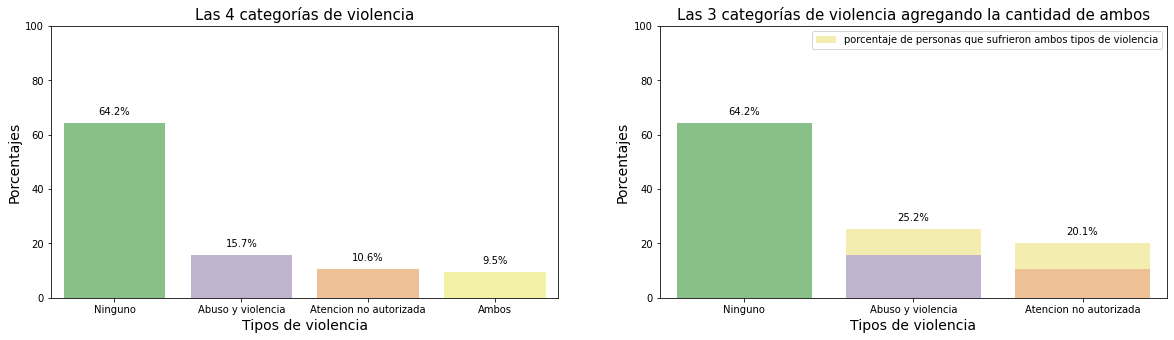

In [45]:
# obtengo las categorias y su cantidad de concurrencias
ocurrencias = seccionX_cls["P10_8"].value_counts()
# sumo el porcentaje con 1 decimal de 'Ambos' para ' Abuso y violencia' y 'Atencion no autorizada'
oc_ambos = np.around(np.array([ocurrencias[0], ocurrencias[1]+ocurrencias[3], ocurrencias[2]+ocurrencias[3]])/ocurrencias.sum()*1000)/10
# obtengo los porcentajes con 1 decimal de los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada'
ocurrencias = np.around(ocurrencias/ocurrencias.sum()*1000)/10
groups = ['Ninguno',  'Abuso y violencia', 'Atencion no autorizada', 'Ambos']

# imprimo los porcentajes
for i,j in zip(groups, ocurrencias):
    print(f'{i}:\t{j}%')

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Grafico los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada' y 'Ambos' 
ax = sns.barplot(x=groups, y=ocurrencias, palette = 'Accent', ax=axes[0])
for x, y in enumerate(ocurrencias):
    ax.text(x, y+3, f'{y}%', ha='center')

# Grafico los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada'. Aparte, 'Ambos' encima de los dos últimos para representar el valor total de estos tipos
groups = ['Ninguno',  'Abuso y violencia', 'Atencion no autorizada']
ax = sns.barplot(x=groups, y=oc_ambos, color = '#fff6a3', label='porcentaje de personas que sufrieron ambos tipos de violencia', ax=axes[1])
sns.barplot(x=groups, y=ocurrencias[:-1], palette = 'Accent', ax=axes[1])
for x, y in enumerate(oc_ambos):
    ax.text(x, y+3, f'{y}%', ha='center')

for ax in axes:
    ax.set_xlabel('Tipos de violencia', fontsize=14)
    ax.set_ylabel('Porcentajes', fontsize=14)
    ax.set_ylim([0, 100])

axes[0].set_title('Las 4 categorías de violencia', fontsize=15)
axes[1].set_title('Las 3 categorías de violencia agregando la cantidad de ambos', fontsize=15)
plt.legend()
plt.show()

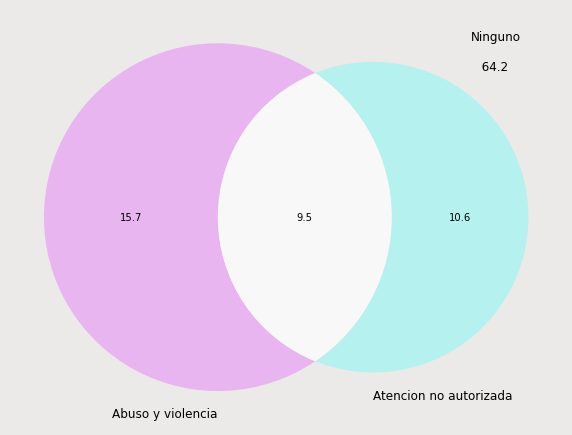

In [46]:
ocurrencias = seccionX_cls["P10_8"].value_counts()
ocurrencias = np.around(ocurrencias/ocurrencias.sum()*1000)/10
fig = plt.figure(figsize=(10, 10), facecolor='#ebeae8')
v = vplt.venn2(subsets={'10':ocurrencias[1], '01':ocurrencias[2], '11':ocurrencias[3]}, set_labels=['Abuso y violencia', 'Atencion no autorizada'], set_colors=('#e89ff5', '#9ff5f1'), alpha = 0.7)
plt.text(0.5, 0.4, f"Ninguno\n\n   {ocurrencias[0]}", fontdict={'size':12})
plt.show()

### Borrar columnas

1. P10_2 porque tienen un único valor al todos los registros haber tenido un embarazo.
2. P10_8_{1,2,3,...,10,12} porque son los datos usados para crear la categoría de violencia.
3. P10_1_{1,2,3,...,9} y P10_5_{1,2,3,...,11} que se usaron para crear las columnas P9_1 y P9_5.
4. P10_8 se creó para la visualización de los datos.
5. VIV_SEL y HOGAR no tiene sentido sin ID_VIV.
6. UPM (unidad primaria de muestreo), UPM_DIS (UPM de diseño), EST_DIS (estrato de diseño), ESTRATO, se pueden omitir al ser dato de la tecnica de muestreo y no de la mujer.
7. FAC_VIV es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las viviendas y la población en general.
8. FAC_MUJ es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las mujeres de 15 años y más.
9. CVE_MUN La clave de municipio depende del estado, habiendo un total de 32 municipios registrados como 1.

In [47]:
labels = ['NOM_ENT', 'NOM_MUN', 'N_REN', 'P10_2', 'P10_8',
         "VIV_SEL", "HOGAR", "UPM", 'UPM_DIS', 'EST_DIS', 'FAC_VIV', 'FAC_MUJ', 'CVE_MUN', 'ESTRATO']
labels.extend([f'P10_1_{i}' for i in range(1,10)])
labels.extend([f'P10_5_0{i}' for i in range(1,10)])
labels.extend([f'P10_5_{i}' for i in range(10,12)])
labels.extend([f'P10_8_{i}' for i in range(1,16)])

seccionX_cls = BorrarColumnas(df=seccionX_cls, cols=labels)

### Guardar dataset

In [48]:
seccionX_cls.shape

(14126, 16)

# Overall

## Unir datasets

In [49]:
result = pd.merge(seccionI, seccionII, how="inner")
result = pd.merge(result, seccionIV, how="inner")
result = pd.merge(result, seccionX_cls, how="inner")

In [50]:
result.reset_index(drop=True, inplace=True) #reajustar el índice

In [51]:
result

,ID_VIV,P1_1,P1_2,P1_2_A,P1_3,P1_5,P1_6,P1_7,P1_9,P1_10_1,...,P10_4_1,P10_4_2,P10_4_3,P10_6ANIO,P10_6MES,P10_7,P10_8_abuso,P10_8_atencion,SERVICIOS_MEDICOS_AFILIADA,DONDE_CONSULTAS_PRENATALES
0,100045.04,1,3,3,4,1,1,10,1.0,NaN,...,1.0,0.0,0.0,4.0,9.0,5.0,0,0,5.0,0.0
1,100054.02,3,1,10,1,1,1,2,1.0,NaN,...,1.0,1.0,0.0,3.0,7.0,1.0,1,0,5.0,0.0
2,100071.02,3,1,3,5,1,1,3,1.0,NaN,...,1.0,0.0,0.0,3.0,5.0,2.0,0,1,0.0,1.0
3,100086.03,3,2,3,6,1,1,6,1.0,NaN,...,1.0,0.0,0.0,5.0,9.0,5.0,0,0,5.0,0.0
4,100087.03,2,1,1,3,1,1,5,1.0,NaN,...,2.0,0.0,0.0,4.0,6.0,5.0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,3260756.06,2,2,4,10,1,1,5,1.0,NaN,...,3.0,0.0,0.0,3.0,2.0,5.0,0,0,5.0,4.0
14122,3260756.03,2,2,3,4,2,1,5,1.0,NaN,...,2.0,0.0,0.0,5.0,5.0,2.0,0,0,0.0,1.0
14123,3260756.04,3,1,1,1,2,1,4,1.0,NaN,...,1.0,0.0,0.0,3.0,8.0,5.0,0,0,8.0,10.0
14124,3260756.01,3,1,2,3,1,1,3,1.0,NaN,...,1.0,0.0,0.0,3.0,9.0,5.0,1,1,8.0,4.0


### Borrar columnas

1. ID_PER no es necesario ya que no necesitamos identificar a las mujeres y son caracteres unicos para cada registro.
2. ID_VIV son caracteres unicos para cada registro.
3. SEXO solo tiene el valor de femenino.

In [52]:
result.SEXO.value_counts(dropna=False)

2    14126
Name: SEXO, dtype: int64

In [53]:
result = BorrarColumnas(df=result, cols=["ID_PER", 'ID_VIV', 'SEXO'])

### Quitar caracteres especiales

Convierto las columnas de texto a numeros

In [54]:
encoder = OrdinalEncoder()

In [55]:
result['DOMINIO'] = encoder.fit_transform(result[['DOMINIO']])
encoder.categories_

[array(['C\r', 'R\r', 'U\r'], dtype=object)]

In [56]:
result['T_INSTRUM'] = encoder.fit_transform(result[['T_INSTRUM']])
encoder.categories_

[array(['A1\r', 'A2\r', 'B1\r', 'B2\r', 'C1\r', 'C2\r'], dtype=object)]

### Escalar columnas continuas

In [57]:
scaler = MinMaxScaler()

In [58]:
result['P1_3'] = scaler.fit_transform(result[['P1_3']])
result['P4_5_AB'] = scaler.fit_transform(result[['P4_5_AB']])
result['P4_7_AB'] = scaler.fit_transform(result[['P4_7_AB']])

### Cambiar edades a rangos
Para la interpretabilidad se hacen rangos de cada 5 años.


|  Código  | Edades     |
|:--------:|:----------:|
| 0        | 10 a 15    |
| 1        | 15 a 19    |
| 2        | 20 a 24    |
| 3        | 25 a 29    |
| 4        | 30 a 34    |
| 5        | 35 a 39    |
| 6        | 40 a 44    |
| 7        | 45 a 49    |

In [59]:
result['EDAD'] = result.EDAD+(result.P10_6ANIO-6)

for i in range(8):
    actual = i*5 + 10
    result.loc[result[(result["EDAD"]>=actual) & (result["EDAD"]<actual+5)].index, "EDAD"] = i

In [60]:
result.EDAD.value_counts()

3.0    4053
2.0    3764
4.0    2768
1.0    1810
5.0    1323
6.0     351
0.0      37
7.0      20
Name: EDAD, dtype: int64

## Acomodar columnas

Para una visioón estética del dataset se dejan las columnas con nombres indicando el tipo de pregunta que representa para el final.

In [63]:
# las columnas en el orden actual
columnas = list(result.columns)

# columnas que pasare al inicio del dataframe
columnas_al_principio = ['CVE_ENT', 'DOMINIO', 'T_INSTRUM']

# quitar las columnas del lugar actual
for i in columnas_al_principio:
    columnas.remove(i)

# pasar al inicio de las columnas
columnas = columnas_al_principio+columnas
    
result = result[columnas]

### Hacer columnas categóricas empiecen en 0

Contar cuántas variables tienen el valor -1 que da error al pasar por XGBoost.

## Borrar columnas

Aquellas columnas que tengan más de 1/3 de datos faltantes serán borrados para no afectar los resultados.

In [64]:
columnas_nan = []
columnas_nan_borrar = []
print('%-10s%-9s%-5s' % ('columna', 'cantidad', 'proporcion'), '\n-----------------------------')
#print(f'{'columna':10} {'cantidad nan':5d}   {'porcentaje':5f}')
for col,nan in zip(result.columns,list(result.isnull().sum())):
    if nan != 0:
        #print('%-12s%-12i%-12i' % (col, nan, nan*100/14126))
        print(f'{col:10} {nan:5d}   {nan*100/14126:5f}')
        if nan > result.shape[0]/3:
            columnas_nan_borrar.append(col)
        else:
            columnas_nan.append(col)

columna   cantidad proporcion 
-----------------------------
P1_10_1    13553   95.943650
P1_10_2    13553   95.943650
P1_10_3    13553   95.943650
P1_10_4    13553   95.943650
P2_5          14   0.099108
P2_6         189   1.337958
P2_12      12843   90.917457
P2_14       5256   37.207985
P2_15       8151   57.702110
P4AB_1       654   4.629761
P4AB_2     12100   85.657653
P4A_2      13555   95.957808
P4B_1      12671   89.699844
P4B_2      12760   90.329888
P4BC_1     12028   85.147954
P4BC_2     12028   85.147954
P4C_1      13483   95.448110
P4BC_3     12028   85.147954
P4BC_4     12028   85.147954
P4BC_5     13992   99.051395
P4_2        8348   59.096701
P4_2_1      8651   61.241682
P4_3         106   0.750389
P4_5_AB     1848   13.082260
P4_5_1_AB   3690   26.122044
P4_6_AB      749   5.302279
P4_7_AB     2545   18.016424
P4_9_1     13984   98.994761
P4_9_2     13911   98.477984
P4_9_3     13897   98.378876
P4_9_4     13031   92.248336
P4_9_5     14009   99.171740
P4_9_6     12757

In [65]:
print(columnas_nan), len(columnas_nan)

['P2_5', 'P2_6', 'P4AB_1', 'P4_3', 'P4_5_AB', 'P4_5_1_AB', 'P4_6_AB', 'P4_7_AB']


(None, 8)

In [66]:
print(columnas_nan_borrar), len(columnas_nan_borrar)

['P1_10_1', 'P1_10_2', 'P1_10_3', 'P1_10_4', 'P2_12', 'P2_14', 'P2_15', 'P4AB_2', 'P4A_2', 'P4B_1', 'P4B_2', 'P4BC_1', 'P4BC_2', 'P4C_1', 'P4BC_3', 'P4BC_4', 'P4BC_5', 'P4_2', 'P4_2_1', 'P4_9_1', 'P4_9_2', 'P4_9_3', 'P4_9_4', 'P4_9_5', 'P4_9_6', 'P4_9_7', 'P4_13_1', 'P4_13_2', 'P4_13_3', 'P4_13_4', 'P4_13_5', 'P4_13_6', 'P4_13_7']


(None, 33)

In [67]:
endireh = BorrarColumnas(result, columnas_nan_borrar)

### Variables que relfejan la misma información

P4_1 y P2_13 reflejan valores similares. P4_1 es Actualmente, ¿usted trabaja por un ingreso, salario o ganancia? y P2_13 es ¿Trabajó la semana pasada?. Como queremos saber rutinas, me quedaré con el valor de P4_1 porque ese fue preguntado directo a la entrevistada (en el otro valor fue a informate que pudo no saber de la situación laboral).

In [68]:
endireh['P4_1'].corr(endireh['P2_13'])

0.8344145029614746

In [69]:
endireh.P4_1.value_counts(dropna=False)

0    8348
1    5778
Name: P4_1, dtype: int64

In [70]:
endireh.P2_13.value_counts(dropna=False)

0.0    8870
1.0    5256
Name: P2_13, dtype: int64

In [71]:
endireh = BorrarColumnas(endireh, ['P2_13'])

### Cambiar nombre de columna

Para que los nombres sean más descriptivos en los resultados.

In [72]:
renombrar_columnas = {'T_INSTRUM' : 'SITUACION_CONYUGAL', 'P1_1': 'MATERIAL_PISOS', 'P1_2': 'CUARTOS_DORMIR', 'P1_2_A': 'CUARTOS_TOTAL', 'P1_3': 'FOCOS',
           'P1_5': 'AGUA', 'P1_6': 'DRENAJE', 'P1_7': 'NUM_RESIDENTES', 'P1_9': 'NUM_HOGARES',
           
           'P2_5': 'RES_MADRE', 'P2_6': 'RES_PADRE', 'NIV': 'ESCOLARIDAD', 'GRA': 'GRADO_ESCOLAR', 'P2_8': 'ALFABETISMO', 
           'P2_9': 'ASISTENCIA_ESC', 'P2_10': 'PERT_INDIGENA', 'P2_11': 'LENG_INDIGENA', 
           
           'P4AB_1': 'VERIF_SITUACION_PAREJA', 'P4_1': 'ENTREVISTADA_TRABAJA', 'P4_3': 'PAREJA_TRABAJA', 'P4_5_AB': 'PAREJA_GANANCIAS',  
           'P4_5_1_AB': 'PAREJA_GANANCIAS_FRECUENCIA', 'P4_6_AB': 'PAREJA_APORTA_PARA_GASTO', 'P4_7_AB': 'PAREJA_CUANTO_APORTA_GASTO', 
           'P4_11': 'LIBERTAD_USAR_DINERO', 
           
           'P10_3': 'NUM_EMBARAZOS', 'P10_4_1': 'NACIO_VIV', 'P10_4_2': 'NACIO_MUERT', 'P10_4_3': 'ABORTO', 'P10_6ANIO': 'ANIO_PARTO',
           'P10_6MES': 'MES_PARTO', 'P10_7': 'DONDE_ATENDIO_PARTO'}

endireh.rename(columns = renombrar_columnas, inplace=True)

In [73]:
print(list(endireh.columns))

['CVE_ENT', 'DOMINIO', 'SITUACION_CONYUGAL', 'MATERIAL_PISOS', 'CUARTOS_DORMIR', 'CUARTOS_TOTAL', 'FOCOS', 'AGUA', 'DRENAJE', 'NUM_RESIDENTES', 'NUM_HOGARES', 'BIENES_DE_VIVIENDA', 'PAREN', 'EDAD', 'RES_MADRE', 'RES_PADRE', 'ESCOLARIDAD', 'GRADO_ESCOLAR', 'ALFABETISMO', 'ASISTENCIA_ESC', 'PERT_INDIGENA', 'LENG_INDIGENA', 'VERIF_SITUACION_PAREJA', 'ENTREVISTADA_TRABAJA', 'PAREJA_TRABAJA', 'PAREJA_GANANCIAS', 'PAREJA_GANANCIAS_FRECUENCIA', 'PAREJA_APORTA_PARA_GASTO', 'PAREJA_CUANTO_APORTA_GASTO', 'LIBERTAD_USAR_DINERO', 'FUENTES_DE_DINERO', 'PROPIEDADES_DEL_HOGAR', 'NUM_EMBARAZOS', 'NACIO_VIV', 'NACIO_MUERT', 'ABORTO', 'ANIO_PARTO', 'MES_PARTO', 'DONDE_ATENDIO_PARTO', 'P10_8_abuso', 'P10_8_atencion', 'SERVICIOS_MEDICOS_AFILIADA', 'DONDE_CONSULTAS_PRENATALES']


### Guardar datasets

In [74]:
endireh 

,CVE_ENT,DOMINIO,SITUACION_CONYUGAL,MATERIAL_PISOS,CUARTOS_DORMIR,CUARTOS_TOTAL,FOCOS,AGUA,DRENAJE,NUM_RESIDENTES,...,NACIO_VIV,NACIO_MUERT,ABORTO,ANIO_PARTO,MES_PARTO,DONDE_ATENDIO_PARTO,P10_8_abuso,P10_8_atencion,SERVICIOS_MEDICOS_AFILIADA,DONDE_CONSULTAS_PRENATALES
0,1,2.0,0.0,1,3,3,0.040816,1,1,10,...,1.0,0.0,0.0,4.0,9.0,5.0,0,0,5.0,0.0
1,1,2.0,4.0,3,1,10,0.010204,1,1,2,...,1.0,1.0,0.0,3.0,7.0,1.0,1,0,5.0,0.0
2,1,2.0,0.0,3,1,3,0.051020,1,1,3,...,1.0,0.0,0.0,3.0,5.0,2.0,0,1,0.0,1.0
3,1,2.0,0.0,3,2,3,0.061224,1,1,6,...,1.0,0.0,0.0,5.0,9.0,5.0,0,0,5.0,0.0
4,1,2.0,0.0,2,1,1,0.030612,1,1,5,...,2.0,0.0,0.0,4.0,6.0,5.0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,32,1.0,0.0,2,2,4,0.102041,1,1,5,...,3.0,0.0,0.0,3.0,2.0,5.0,0,0,5.0,4.0
14122,32,1.0,0.0,2,2,3,0.040816,2,1,5,...,2.0,0.0,0.0,5.0,5.0,2.0,0,0,0.0,1.0
14123,32,1.0,0.0,3,1,1,0.010204,2,1,4,...,1.0,0.0,0.0,3.0,8.0,5.0,0,0,8.0,10.0
14124,32,1.0,0.0,3,1,2,0.030612,1,1,3,...,1.0,0.0,0.0,3.0,9.0,5.0,1,1,8.0,4.0


# Estadísticas simples interesantes?

Violencia en las trabajadores domésticas.

In [75]:
result[result.PAREN==5][['PAREN', 'P10_8_abuso', 'P10_8_atencion', 'NIV', 'GRA', 'P2_13', 'P2_15']]

,PAREN,P10_8_abuso,P10_8_atencion,NIV,GRA,P2_13,P2_15
419,5,0,0,3.0,3.0,0.0,NaN
604,5,0,0,4.0,1.0,1.0,1.0
632,5,0,0,3.0,3.0,0.0,NaN
646,5,0,0,3.0,3.0,0.0,NaN
722,5,0,0,4.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...
12741,5,0,0,3.0,3.0,1.0,1.0
12946,5,0,0,4.0,1.0,0.0,NaN
13343,5,1,0,3.0,3.0,1.0,2.0
13585,5,1,0,4.0,1.0,0.0,NaN


Violencia en las personas con alguna limitación física o mental que le impide trabajar.

In [76]:
result[result.P2_14==10][['PAREN', 'P10_8_abuso', 'P10_8_atencion', 'NIV', 'GRA', 'P2_13', 'P2_14', 'P2_15']]

,PAREN,P10_8_abuso,P10_8_atencion,NIV,GRA,P2_13,P2_14,P2_15
0,4,0,0,3.0,3.0,0.0,10.0,NaN
3,4,0,0,3.0,2.0,0.0,10.0,NaN
4,2,1,1,4.0,1.0,0.0,10.0,NaN
5,2,0,0,3.0,3.0,0.0,10.0,NaN
9,2,0,0,2.0,6.0,0.0,10.0,NaN
...,...,...,...,...,...,...,...,...
14119,2,0,0,4.0,3.0,0.0,10.0,NaN
14120,2,0,1,4.0,3.0,0.0,10.0,NaN
14121,1,0,0,3.0,3.0,0.0,10.0,NaN
14123,2,0,0,3.0,3.0,0.0,10.0,NaN


Notar que de la seccion 4 solo se quedaron aquellas de las casadas y no hay de solteras

# Descripción de los datos resultantes

## General

1. CVE_ENT:     clave de entidad federativo (estado). Del 1 al 32.
4. DOMINIO:     si vive en área urbana, semiurbana o rural. Del 0 al 2.
5. SITUACION_CONYUGAL:   situación ormántica de la mujer elegida. Del 0 al 5.

## SECCIÓN I. CARACTERÍSTICAS DE LA VIVIENDA Y HOGARES EN LA VIVIENDA

1. MATERIAL_PISOS: material del piso en la vivienda. Del 0 al 2.
2. CUARTOS_DORMIR: cantidad de cuartos para dormir. Del 0 al 9.
3. CUARTOS_TOTAL: cantidad de cuartos en la vivienda. Del 1 al 13.
4. FOCOS: número de focos. Del 0 al 1, donde 0 refleja 1 foco y 1 refleja 98 focos.
5. BIENES_DE_VIVIENDA: cuántos de los bienes listados hay aunque sea 1 en la vivienda. Del 0 al 9, donde 0 refleja ninguno y 9 refleja que tiene todos.
    1. P1_4_1:   tiene aparato para oír radio.
    2. P1_4_2:   tiene television.
    3. P1_4_3:   tiene computadora.
    4. P1_4_4:   tiene linea telefonica fija.
    5. P1_4_5:   tiene telefono celular.
    6. P1_4_6:  tiene refrigerador.
    7. P1_4_7:  tiene lavadora.
    8. P1_4_8:  tiene auto o camioneta.
    9. P1_4_9:  tiene servicio de internet.
6. AGUA: tipos de acceso a agua que tienen en la vivienda. Del 0 al 5.
7. DRENAJE: tipos de acceso a drenaje que tienen en la vivienda. Del 0 al 4.
8. NUM_RESIDENTES: cantidad de personas que viven en la vivienda. Del 1 a 24.
9. NUM_HOGARES: cuantos grupos de personas comparten gastos en la vivienda. Del 1 al 5.

## SECCIÓN II. CARACTERÍSTICAS SOCIODEMOGRÁFICAS DE RESIDENTES DE LA VIVIENDA

1. PAREN: parentezco de la mujer elegida a el/la jefe/jefa del hogar. Del 1 al 5.
2. EDAD: rango de edad de la mujer elegida creado en esta libreta. Del 0 al 8.
3. RES_MADRE: residencia de la madre (categorias creadas en esta libreta). 0 (vive con ella), 1 (vive n otra vivienda), 2 (falleció) y NULL (no sabe).
4. RES_PADRE: residencia del padre (categorias creadas en esta libreta). 0 (vive con ella), 1 (vive n otra vivienda), 2 (falleció) y NULL (no sabe).
5. ESCOLARIDAD: último nivel de estudios cursado. Del 0 al 11.
6. GRADO_ESCOLAR: último grado de estudios cursado. Del 0 al 8.
7. ALFABETISMO: si sabe leer y escribir un recado. 0 o 1.
8. ASISTENCIA_ESC: si asiste actualmente a la escuela. 0 o 1.
9. PERT_INDIGENA: si se considera indígene. 0 (si), 1 (si en parte), 2 (no) y 7 (no sabe).
10. LENG_INDIGENA: si habla alguna lengua indígena. 0 o 1.

## SECCIÓN IV. SITUACIÓN DE LA RELACIÓN DE PAREJA/INGRESOS Y RECURSOS

1. VERIF_SITUACION_PAREJA: Desarrollo de SITUACION_CONYUGAL. Del 0 al 3.
2. ENTREVISTADA_TRABAJA: Si la entrevistada trabaja por un ingreso, salario o ganancia. 0 o 1.
3. PAREJA_TRABAJA: Si la pareja de la entrevistada trabaja. 0 o 1.
4. PAREJA_GANANCIAS: Cuanto gana la pareja. 0 a 1.
5. PAREJA_GANANCIAS_FRECUENCIA: Con que frecuencia teien ganancias. 0 (a la semana), 1 (a la quincena), 2 (al mes) y NULL (no sabe).
6. PAREJA_APORTA_PARA_GASTO: Si la pareja aporta para el gasto de la vivienda. 0 (si), 1 (no), 2 (no tienen hijxs en comun o ya son grandes) y NULL.
7. PAREJA_CUANTO_APORTA_GASTO: Cuanto aporta la pareja para el gasto de la vivienda. 0 a 1.
8. LIBERTAD_USAR_DINERO: libertad d ela entrevistada de usar el dinero como quiera. 0 o 1.
9. FUENTES_DE_DINERO: Cantidad de fuentes de dinero de la entrevistada. 0 a 4.
10. PROPIEDADES_DEL_HOGAR: DE las personas que viven en el hogar, de cuantos patrimonios/propiedades son dueños. 0 a 7.

## SECCIÓN IX. ATENCIÓN OBSTÉTRICA

1. P10SERVICIOS_MEDICOS_AFILIADA_1: afiliación a servicios médicos.
2. NUM_EMBARAZOS: embarazos que tuvo durante el periodo de la encuesta. del 1 al 18.
3. NACIO_VIV: cuantos partos el resultado nació vivo. Del 0 al 10.
4. NACIO_MUERT: cuantos partos el resultado nació muerto. Del 0 al 6.
5. ABORTO: cuantos partos el resultado fue aborto. Del 0 al 5.
6. DONDE_CONSULTAS_PRENATALES: servicio(s) médico(s) donde atendió consultas prenatales. 
7. P10_6ANIO_PARTOANIO: año del último parto. Del 0 al 5 representando del 2016 al 2021.
8. MES_PARTO: año del último parto. Del 0 al 12 representando los meses del año.
9. DONDE_ATENDIO_PARTO: donde se atendió el parto. Del 0 al 4.
10. P10_8_abuso: si sufrió del tipo de violencia obstétrica 'abuso o violencia'. 0 o 1.
11. P10_8_atencion: si sufrió el tipo de violencia obstétrica 'atención no autorizada'. 0 o 1.

# Repaso

In [77]:
endireh.shape

(14126, 43)

In [78]:
columnas_regression = ['FOCOS', 'PAREJA_GANANCIAS', 'PAREJA_CUANTO_APORTA_GASTO'] 
#StandardScaler

columnas_nan = ['RES_MADRE', 'RES_PADRE', 'VERIF_SITUACION_PAREJA', 'PAREJA_TRABAJA', 'PAREJA_GANANCIAS', 
                'PAREJA_GANANCIAS_FRECUENCIA', 'PAREJA_APORTA_PARA_GASTO', 'PAREJA_CUANTO_APORTA_GASTO'] 
#cuando son objetivo solo se usan aquellas que tienen datos

columnasBin = ['ALFABETISMO', 'ASISTENCIA_ESC', 'LENG_INDIGENA', 'ENTREVISTADA_TRABAJA', 
               'LIBERTAD_USAR_DINERO', 'P10_8_abuso', 'P10_8_atencion']


In [79]:
multcat = []
for c in endireh.columns:
    if c not in columnas_regression and c not in columnasBin:
        multcat.append(c)
multcat

['CVE_ENT',
 'DOMINIO',
 'SITUACION_CONYUGAL',
 'MATERIAL_PISOS',
 'CUARTOS_DORMIR',
 'CUARTOS_TOTAL',
 'AGUA',
 'DRENAJE',
 'NUM_RESIDENTES',
 'NUM_HOGARES',
 'BIENES_DE_VIVIENDA',
 'PAREN',
 'EDAD',
 'RES_MADRE',
 'RES_PADRE',
 'ESCOLARIDAD',
 'GRADO_ESCOLAR',
 'PERT_INDIGENA',
 'VERIF_SITUACION_PAREJA',
 'PAREJA_TRABAJA',
 'PAREJA_GANANCIAS_FRECUENCIA',
 'PAREJA_APORTA_PARA_GASTO',
 'FUENTES_DE_DINERO',
 'PROPIEDADES_DEL_HOGAR',
 'NUM_EMBARAZOS',
 'NACIO_VIV',
 'NACIO_MUERT',
 'ABORTO',
 'ANIO_PARTO',
 'MES_PARTO',
 'DONDE_ATENDIO_PARTO',
 'SERVICIOS_MEDICOS_AFILIADA',
 'DONDE_CONSULTAS_PRENATALES']